In [1]:
from rdkit import Chem
import numpy as np
import pickle
from dataset import *
from torch.utils.data import DataLoader, Dataset

/home/fibra/anaconda3/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
with open("data/MOLS/3ui7_molecules.pkl", "rb") as f:
    m1, m2 = pickle.load(f)

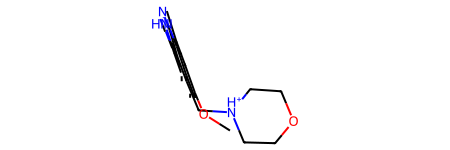

In [3]:
dir = "data/CASF-2016/coreset/3ui7/"
mol_l = Chem.MolFromMol2File(dir + "3ui7_ligand.mol2")
mol_l #Corrupted from the start

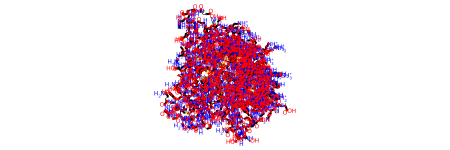

In [4]:
mol_p = Chem.MolFromPDBFile(dir + "3ui7_protein.pdb")
mol_p #the .mol2 file is corrupted -> leads to None type

<class 'rdkit.Chem.rdchem.Mol'>
<class 'rdkit.Chem.rdchem.Mol'>


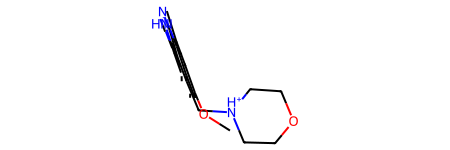

In [5]:
print(type(m1))
print(type(m2))
m1 #it works

In [2]:
key_file = "coreset_keys.txt"
keys_ = read_keys(key_file)[:20]
#two proteins that are still NoneType
# even when using the PDB file
except_ = ["1gpk", "3kwa"]
keys = [key for key in keys_ if key not in except_]
set_file = "data/CASF-2016/power_docking/CoreSet.dat"
data_dir = "data/MOLS/"
id_to_y = create_key_to_y(key_file, set_file)


dataloader = get_dataset_dataloader(keys, data_dir, id_to_y, 5)

In [16]:
for i in range(10):
    print(dataloader.dataset[i].x_lig.shape)

torch.Size([29, 54])
torch.Size([21, 54])
torch.Size([36, 54])
torch.Size([24, 54])
torch.Size([30, 54])
torch.Size([24, 54])
torch.Size([28, 54])
torch.Size([30, 54])
torch.Size([23, 54])
torch.Size([30, 54])


In [3]:
for i, batch in enumerate(dataloader):
    for sample in batch:
        print(sample.A_inter)
        break

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [1, 0, 0,  ..., 1, 1, 1],
         [1, 0, 0,  ..., 1, 1, 0],
         [1, 0, 0,  ..., 1, 1, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0

In [28]:
x_lig_ = [dataloader.dataset[i].x_lig for i in range(10)]
#batch_x_lig = torch.stack(x_lig_, dim=0)
x_lig_cat = torch.cat([x.unsqueeze(0) for x in x_lig_], dim = 1)
x_lig_cat.shape

torch.Size([1, 275, 54])

In [9]:
for i, batch in enumerate(dataloader):
    print(batch)

[Data(x_lig=[30, 54], x_tar=[2262, 54], lig_e_idx=[2, 86], tar_e_idx=[2, 6144], A_inter=[3, 28, 2014]), Data(x_lig=[30, 54], x_tar=[2262, 54], lig_e_idx=[2, 94], tar_e_idx=[2, 4669], A_inter=[3, 30, 1531]), Data(x_lig=[30, 54], x_tar=[2262, 54], lig_e_idx=[2, 91], tar_e_idx=[2, 6902], A_inter=[3, 29, 2262]), Data(x_lig=[30, 54], x_tar=[2262, 54], lig_e_idx=[2, 55], tar_e_idx=[2, 5920], A_inter=[3, 17, 1954]), Data(x_lig=[30, 54], x_tar=[2262, 54], lig_e_idx=[2, 98], tar_e_idx=[2, 5994], A_inter=[3, 30, 1968])]
[Data(x_lig=[30, 54], x_tar=[3530, 54], lig_e_idx=[2, 78], tar_e_idx=[2, 7820], A_inter=[3, 24, 2562]), Data(x_lig=[30, 54], x_tar=[3530, 54], lig_e_idx=[2, 76], tar_e_idx=[2, 6469], A_inter=[3, 24, 2123]), Data(x_lig=[30, 54], x_tar=[3530, 54], lig_e_idx=[2, 88], tar_e_idx=[2, 7870], A_inter=[3, 28, 2586]), Data(x_lig=[30, 54], x_tar=[3530, 54], lig_e_idx=[2, 94], tar_e_idx=[2, 4696], A_inter=[3, 30, 1540]), Data(x_lig=[30, 54], x_tar=[3530, 54], lig_e_idx=[2, 53], tar_e_idx=[2,

In [8]:
err_keys = []
for idx in range(len(dataloader.dataset)):
    try:
        sample = dataloader.dataset[idx]
        if sample is None:
            err_keys.append(dataloader.dataset.keys[idx])
    except Exception as e:
        print(f"Error accessing index {idx}: {e}")
        err_keys.append(dataloader.dataset.keys[idx])

Error accessing index 8: Python argument types in
    rdkit.Chem.rdmolops.RemoveHs(NoneType)
did not match C++ signature:
    RemoveHs(RDKit::ROMol mol, RDKit::MolOps::RemoveHsParameters params, bool sanitize=True)
    RemoveHs(RDKit::ROMol mol, bool implicitOnly=False, bool updateExplicitCount=False, bool sanitize=True)
Error accessing index 183: '*'


In [9]:
err_keys #still have two complexes that can't be used

['1gpk', '3kwa']